In [ ]:
## analizando las temperaturas en Argentina

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import datetime

In [2]:
pwd

'/home/jupyter-saranda4@miners.ut-6892e/Final_Project'

In [3]:
#Load the file:
#data_folder = Path(".") / "data"

data = pd.read_csv('registro_temperatura365d_smn1.csv')
data.head()

,FECHA,TMAX,TMIN,NOMBRE
0,Mar-23,30.6,24.5,AEROPARQUE AERO
1,Mar-23,28.5,19.9,AZUL AERO
2,Mar-23,32.3,21.2,BAHIA BLANCA AERO
3,Mar-23,19.4,11.5,BARILOCHE AERO
4,Mar-23,-6.0,-13.7,BASE BELGRANO II


In [4]:
data.dtypes #Esto me muestra que formato tiene mi fecha al parecer esun objeto, o sea esta siendo almacenado como string

FECHA      object
TMAX      float64
TMIN      float64
NOMBRE     object
dtype: object

In [6]:
data.shape

(44356, 4)

In [7]:
data1 = data.dropna()
data1.shape

(42165, 4)

In [8]:
#Para separar solo las estaciones metereologicas que queremos 
stations=data1.loc[(data1['NOMBRE']=="AEROPARQUE AERO")| (data1['NOMBRE']=="BUENOS AIRES OBSERVATORIO")|(data1['NOMBRE']=="EL PALOMAR AERO")|(data1['NOMBRE']=="MERLO AERO")|(data1['NOMBRE']=="MORON AERO")|(data1['NOMBRE']=="NUEVE DE JULIO")]
stations.to_csv('stations.csv')
stations.head(20
             )

,FECHA,TMAX,TMIN,NOMBRE
0,Mar-23,30.6,24.5,AEROPARQUE AERO
13,Mar-23,30.6,26.6,BUENOS AIRES OBSERVATORIO
32,Mar-23,30.8,24.2,EL PALOMAR AERO
63,Mar-23,31.4,25.9,MORON AERO
65,Mar-23,32.6,21.8,NUEVE DE JULIO
122,Mar-23,35.1,27.4,AEROPARQUE AERO
135,Mar-23,37.0,27.6,BUENOS AIRES OBSERVATORIO
154,Mar-23,37.0,26.9,EL PALOMAR AERO
185,Mar-23,37.0,26.8,MORON AERO
187,Mar-23,31.8,22.9,NUEVE DE JULIO


In [9]:
# creamos una columna de T_average para todas las estaciones (6)
stations["T_AVE"] = (stations['TMAX'] + stations['TMIN'])/2
stations = stations.reindex(columns=['FECHA','TMAX','TMIN','T_AVE','NOMBRE'])
stations.head(6)

/tmp/ipykernel_944464/14042063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["T_AVE"] = (stations['TMAX'] + stations['TMIN'])/2


,FECHA,TMAX,TMIN,T_AVE,NOMBRE
0,Mar-23,30.6,24.5,27.55,AEROPARQUE AERO
13,Mar-23,30.6,26.6,28.60,BUENOS AIRES OBSERVATORIO
32,Mar-23,30.8,24.2,27.50,EL PALOMAR AERO
63,Mar-23,31.4,25.9,28.65,MORON AERO
65,Mar-23,32.6,21.8,27.20,NUEVE DE JULIO
122,Mar-23,35.1,27.4,31.25,AEROPARQUE AERO


In [10]:
#Grupos por estaciones de trabajo (6) LO HACEMOS PARA CADA UNA DE LAS 6 ESTACIONES Y CON LAS FECHAS VOLTEADAS DE 
#MENOR A MAYOR: station1, station2, station3, station4,...station6

#...Este ejemplo es de station6

station1=stations.loc[stations['NOMBRE']=="AEROPARQUE AERO"].to_csv("station1.csv")
station1= pd.read_csv('station1.csv')
#station1.head(30)
station1.sort_values("Unnamed: 0", axis = 0, ascending = False,
                 inplace = True)
#Eliminando la columna Unnamed de station1: llamamos al file enc aso de hacerlo en otro momento...
#station6 = pd.read_csv('station6.csv')
# If you know the name of the column skip this
Unnamed = station1.columns[0]
# Delete first
station1 = station1.drop([Unnamed], axis=1)
station1.to_csv('station1.csv', index=False)
station1

,FECHA,TMAX,TMIN,T_AVE,NOMBRE
364,Mar-22,27.6,19.8,23.70,AEROPARQUE AERO
363,Mar-22,28.6,21.3,24.95,AEROPARQUE AERO
362,Mar-22,26.1,14.3,20.20,AEROPARQUE AERO
361,Mar-22,18.9,11.4,15.15,AEROPARQUE AERO
360,Mar-22,20.6,13.0,16.80,AEROPARQUE AERO
...,...,...,...,...,...
4,Mar-23,35.6,26.5,31.05,AEROPARQUE AERO
3,Mar-23,34.6,27.8,31.20,AEROPARQUE AERO
2,Mar-23,31.8,26.4,29.10,AEROPARQUE AERO
1,Mar-23,35.1,27.4,31.25,AEROPARQUE AERO


In [65]:
# read the datasets y CREAR UN TABLA DE TODAS LAS ESTACIONES (6) POR GRUPOS UNO DEBAJO DEL OTRO
a = pd.read_csv(r"station1.csv")
b = pd.read_csv(r"station2.csv")
c = pd.read_csv(r"station3.csv")
d = pd.read_csv(r"station4.csv")
e = pd.read_csv(r"station5.csv")
f = pd.read_csv(r"station6.csv")
# print the datasets
#print(a.head())
#print(b.head())
#print(c.head())
#print(d.head())
#print(e.head())
#print(f.head())

Seis_Est_ord = pd.concat([a, b, c, d, e, f], ignore_index=True)
print(Seis_Est_ord)

Seis_Est_ord.to_csv('Seis_Est_ord.csv')

       FECHA  TMAX  TMIN  T_AVE           NOMBRE
0     Mar-22  27.6  19.8  23.70  AEROPARQUE AERO
1     Mar-22  28.6  21.3  24.95  AEROPARQUE AERO
2     Mar-22  26.1  14.3  20.20  AEROPARQUE AERO
3     Mar-22  18.9  11.4  15.15  AEROPARQUE AERO
4     Mar-22  20.6  13.0  16.80  AEROPARQUE AERO
...      ...   ...   ...    ...              ...
1820  Mar-23  39.4  19.9  29.65   NUEVE DE JULIO
1821  Mar-23  39.6  23.6  31.60   NUEVE DE JULIO
1822  Mar-23  38.1  22.1  30.10   NUEVE DE JULIO
1823  Mar-23  31.8  22.9  27.35   NUEVE DE JULIO
1824  Mar-23  32.6  21.8  27.20   NUEVE DE JULIO

[1825 rows x 5 columns]


In [92]:
#SACAMOS    P R O M E D I O S   DE LOS VALORES DE TEMPERATURA PARA CADA MES DISPONIBLE DE 2022 Y 2023 PARA CADA ESTACION
#a=station1.groupby(["NOMBRE", "FECHA"]).TMAX.mean()
#a
#b=station1.groupby(["NOMBRE", "FECHA"]).TMIN.mean()
#b
#c=station1.groupby(["NOMBRE", "FECHA"]).T_AVE.mean()
#c
#display(a, b,c)
#merge data
#ab=pd.merge(a, b, on='FECHA')
#ab
#abc=pd.merge(ab, c, on='FECHA')
#abc

#abc=abc.assign(NOMBRE='AEROPARQUE AERO')
#print(abc)

             TMAX       TMIN      T_AVE           NOMBRE
FECHA                                                   
Apr-22  21.756667  14.506667  18.131667  AEROPARQUE AERO
Aug-22  16.696774   9.383871  13.040323  AEROPARQUE AERO
Dec-22  28.903226  19.858065  24.380645  AEROPARQUE AERO
Feb-23  29.642857  20.628571  25.135714  AEROPARQUE AERO
Jan-23  30.654839  21.867742  26.261290  AEROPARQUE AERO
Jul-22  15.554839   8.916129  12.235484  AEROPARQUE AERO
Jun-22  13.980000   7.276667  10.628333  AEROPARQUE AERO
Mar-22  23.906250  15.000000  19.453125  AEROPARQUE AERO
Mar-23  32.700000  24.766667  28.733333  AEROPARQUE AERO
May-22  17.309677  10.345161  13.827419  AEROPARQUE AERO
Nov-22  26.680000  17.666667  22.173333  AEROPARQUE AERO
Oct-22  22.119355  13.141935  17.630645  AEROPARQUE AERO
Sep-22  19.050000  11.440000  15.245000  AEROPARQUE AERO


KeyError: 'FECHA'

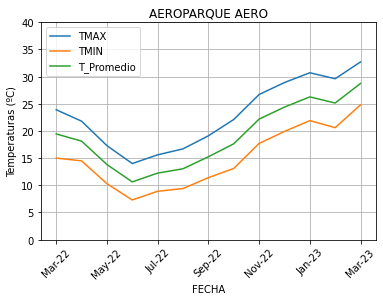

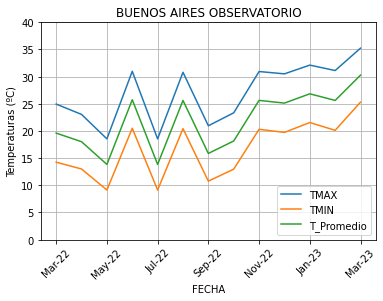

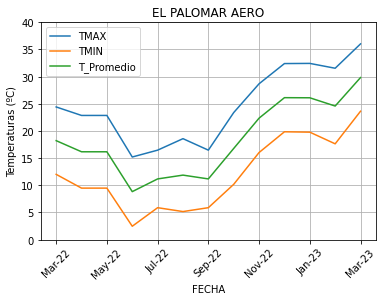

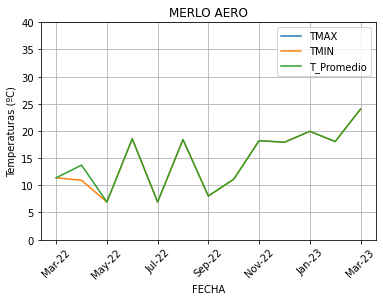

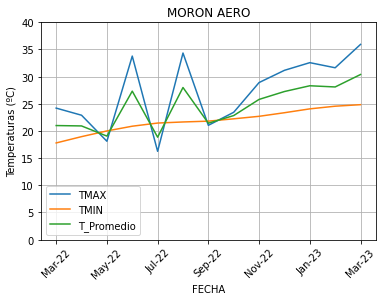

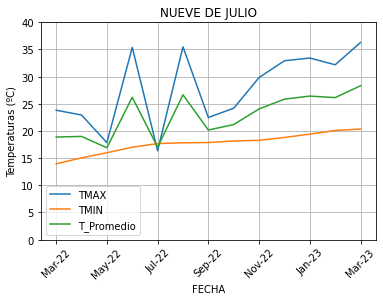

In [102]:
#CREAMOS GRAFICAS DE LINEAS CON TMAX, TMIN, T_AVE PARA CADA ESTACION, BASADOS EN LOS ARCHIVOS CSV DE PROMEDIOS POR ESTACION 
#station1_Ave.csv...station6_Ave.csv

station1= pd.read_csv('station1_Avg.csv')
#Rename heads
station1=station1.rename(columns={"T_AVE":"T_Promedio"})
#graphs
station1.plot('FECHA'), plt.ylabel ("Temperaturas (ºC)"),plt.title("AEROPARQUE AERO"), plt.ylim([0,40]), plt.grid(), plt.xticks(rotation=45), plt.gca().invert_xaxis(), 
plt.savefig("station1_Avg.png", dpi=300)

station2= pd.read_csv('station2_Avg.csv')
#Rename heads
station2=station2.rename(columns={"T_AVE":"T_Promedio"})
#graphs
station2.plot('FECHA'), plt.ylabel ("Temperaturas (ºC)"),plt.title("BUENOS AIRES OBSERVATORIO"), plt.ylim([0,40]), plt.grid(), plt.xticks(rotation=45), plt.gca().invert_xaxis(), 
plt.savefig("station2_Avg.png", dpi=300)


station3= pd.read_csv('station3_Avg.csv')
#Rename heads
station3=station3.rename(columns={"T_AVE":"T_Promedio"})
#graphs
station3.plot('FECHA'), plt.ylabel ("Temperaturas (ºC)"),plt.title("EL PALOMAR AERO"), plt.ylim([0,40]), plt.ylim([0,40]), plt.grid(), plt.xticks(rotation=45), plt.gca().invert_xaxis(), 
plt.savefig("station3_Avg.png", dpi=300)


station4= pd.read_csv('station4_Avg.csv')
#Rename heads
station4=station4.rename(columns={"T_AVE":"T_Promedio"})
#graphs
station4.plot('FECHA'), plt.ylabel ("Temperaturas (ºC)"),plt.title("MERLO AERO"), plt.ylim([0,40]), plt.grid(), plt.xticks(rotation=45), plt.gca().invert_xaxis(), 
plt.savefig("station4_Avg.png", dpi=300)


station5= pd.read_csv('station5_Avg.csv')
#Rename heads
station5=station5.rename(columns={"T_AVE":"T_Promedio"})
#graphs
station5.plot('FECHA'), plt.ylabel ("Temperaturas (ºC)"),plt.title("MORON AERO"), plt.ylim([0,40]), plt.grid(), plt.xticks(rotation=45), plt.gca().invert_xaxis(), 
plt.savefig("station5_Avg.png", dpi=300)

station6= pd.read_csv('station6_Avg.csv')
#Rename heads
station6=station6.rename(columns={"T_AVE":"T_Promedio"})
#graphs
station6.plot('FECHA'), plt.ylabel ("Temperaturas (ºC)"),plt.title("NUEVE DE JULIO"), plt.ylim([0,40]), plt.grid(), plt.xticks(rotation=45), plt.gca().invert_xaxis(), 
plt.savefig("station6_Avg.png", dpi=300)



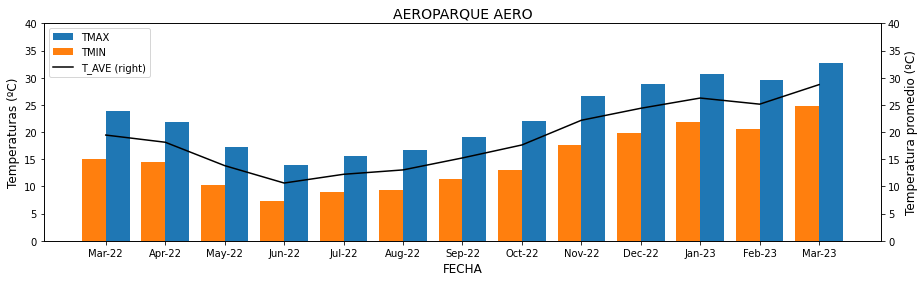

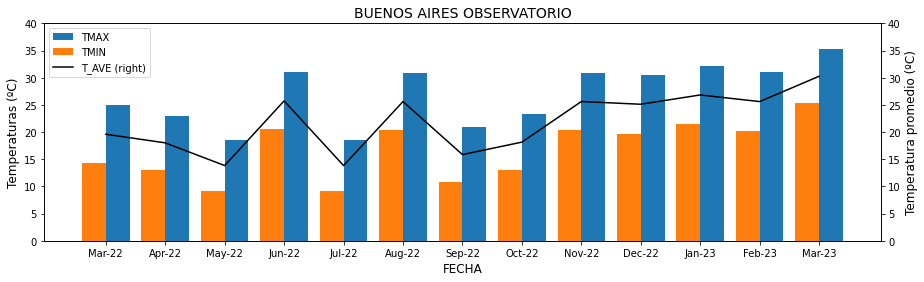

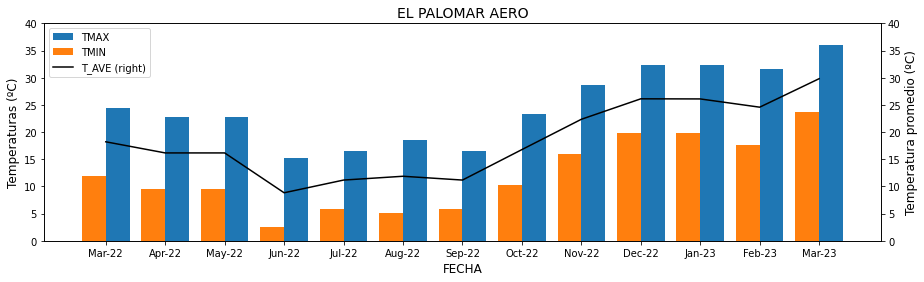

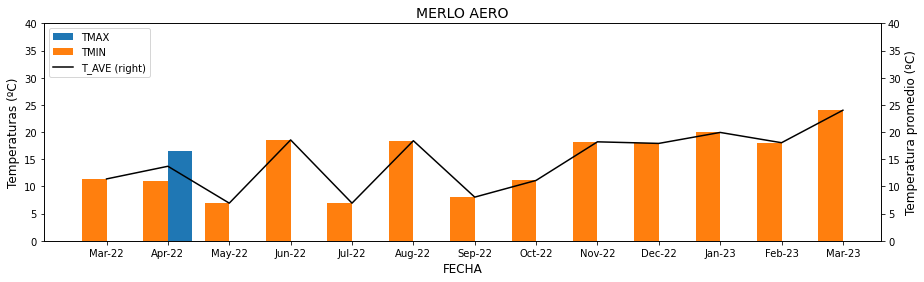

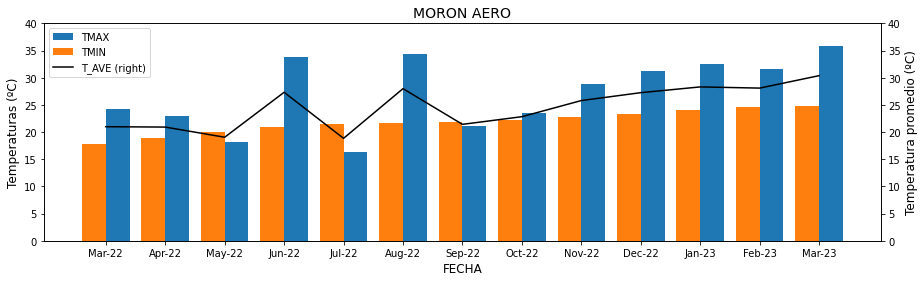

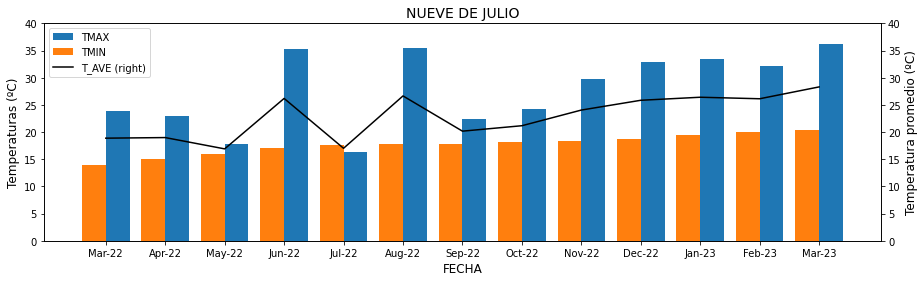

In [104]:
station1= pd.read_csv('station1_Avg.csv')

fig, ax=plt.subplots()

X= station1['FECHA']
TMAX = station1['TMAX']
TMIN = station1['TMIN']

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, TMAX, 0.4, label = 'TMAX'), plt.ylim([0,40])
plt.bar(X_axis + 0.2, TMIN, 0.4, label = 'TMIN')
  
plt.xticks(X_axis, X), plt.xticks(rotation=45), plt.xlabel("Fechas", size=12), 
plt.ylabel("Temperaturas (ºC)", size=12), plt.legend()

station1.plot(x ='FECHA', y='T_AVE', ax = ax, secondary_y = True, color='Black', figsize=(15,4)),
ax.right_ax.set_ylabel('Temperatura promedio (ºC)', size=12),
plt.title("AEROPARQUE AERO", fontsize=14), plt.ylim([0,40]), ax.invert_xaxis(),plt.savefig("Station1_bars.png", dpi=300)
plt.show()


station2= pd.read_csv('station2_Avg.csv')
fig, ax=plt.subplots()
X= station2['FECHA']
TMAX = station2['TMAX']
TMIN = station2['TMIN']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, TMAX, 0.4, label = 'TMAX'), plt.ylim([0,40])
plt.bar(X_axis + 0.2, TMIN, 0.4, label = 'TMIN')
plt.xticks(X_axis, X), plt.xticks(rotation=45), plt.xlabel("Fechas", size=12), plt.ylabel("Temperaturas (ºC)", size=12), plt.legend()
station2.plot(x ='FECHA', y='T_AVE', ax = ax, secondary_y = True, color='Black', figsize=(15,4)),ax.right_ax.set_ylabel('Temperatura promedio (ºC)', size=12) 
plt.xlabel("Fechas", size=12), plt.title("BUENOS AIRES OBSERVATORIO", fontsize=14), plt.ylim([0,40]), ax.invert_xaxis(),plt.savefig("Station2_bars.png", dpi=300)
plt.show()

station3= pd.read_csv('station3_Avg.csv')
fig, ax=plt.subplots()
X= station3['FECHA']
TMAX = station3['TMAX']
TMIN = station3['TMIN']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, TMAX, 0.4, label = 'TMAX'), plt.ylim([0,40])
plt.bar(X_axis + 0.2, TMIN, 0.4, label = 'TMIN')
plt.xticks(X_axis, X), plt.xticks(rotation=45), plt.xlabel("Fechas", size=12), plt.ylabel("Temperaturas (ºC)", size=12), plt.legend()
station3.plot(x ='FECHA', y='T_AVE', ax = ax, secondary_y = True, color='Black', figsize=(15,4)),ax.right_ax.set_ylabel('Temperatura promedio (ºC)', size=12) 
plt.xlabel("Fechas", size=12), plt.title("EL PALOMAR AERO", fontsize=14), plt.ylim([0,40]), ax.invert_xaxis(),plt.savefig("Station3_bars.png", dpi=300)
plt.show()

station4= pd.read_csv('station4_Avg.csv')
fig, ax=plt.subplots()
X= station4['FECHA']
TMAX = station4['TMAX']
TMIN = station4['TMIN']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, TMAX, 0.4, label = 'TMAX'), plt.ylim([0,40])
plt.bar(X_axis + 0.2, TMIN, 0.4, label = 'TMIN')
plt.xticks(X_axis, X), plt.xticks(rotation=45), plt.xlabel("Fechas", size=12), plt.ylabel("Temperaturas (ºC)", size=12), plt.legend()
station4.plot(x ='FECHA', y='T_AVE', ax = ax, secondary_y = True, color='Black', figsize=(15,4)),ax.right_ax.set_ylabel('Temperatura promedio (ºC)', size=12) 
plt.xlabel("Fechas", size=12), plt.title("MERLO AERO", fontsize=14), plt.ylim([0,40]), ax.invert_xaxis(),plt.savefig("Station4_bars.png", dpi=300)
plt.show()

station5= pd.read_csv('station5_Avg.csv')
fig, ax=plt.subplots()
X= station5['FECHA']
TMAX = station5['TMAX']
TMIN = station5['TMIN']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, TMAX, 0.4, label = 'TMAX'), plt.ylim([0,40])
plt.bar(X_axis + 0.2, TMIN, 0.4, label = 'TMIN')
plt.xticks(X_axis, X), plt.xticks(rotation=45), plt.xlabel("Fechas", size=12), plt.ylabel("Temperaturas (ºC)", size=12), plt.legend()
station5.plot(x ='FECHA', y='T_AVE', ax = ax, secondary_y = True, color='Black', figsize=(15,4)),ax.right_ax.set_ylabel('Temperatura promedio (ºC)', size=12) 
plt.xlabel("Fechas", size=12), plt.title("MORON AERO", fontsize=14), plt.ylim([0,40]), ax.invert_xaxis(),plt.savefig("Station5_bars.png", dpi=300)
plt.show()

station6= pd.read_csv('station6_Avg.csv')
fig, ax=plt.subplots()
X= station6['FECHA']
TMAX = station6['TMAX']
TMIN = station6['TMIN']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, TMAX, 0.4, label = 'TMAX'), plt.ylim([0,40])
plt.bar(X_axis + 0.2, TMIN, 0.4, label = 'TMIN')
plt.xticks(X_axis, X), plt.xticks(rotation=45), plt.xlabel("Fechas", size=12), plt.ylabel("Temperaturas (ºC)", size=12), plt.legend()
station6.plot(x ='FECHA', y='T_AVE', ax = ax, secondary_y = True, color='Black', figsize=(15,4)),ax.right_ax.set_ylabel('Temperatura promedio (ºC)', size=12) 
plt.xlabel("Fechas", size=12), plt.title("NUEVE DE JULIO", fontsize=14), plt.ylim([0,40]), ax.invert_xaxis(),plt.savefig("Station6_bars.png", dpi=300)
plt.show()

In [90]:
station1, station2, station3, station4, station5, station6

(['FECHA', 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE'],
 ['FECHA', 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE'],
 ['FECHA', 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE'],
 ['FECHA', 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE'],
 ['FECHA', 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE'],
 ['FECHA', 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE'])

In [59]:
#sumar por nombre las Temperaturas
Verstations = pd.DataFrame(Verstations.iloc[0:3,'TMAX', 0:3,'TMIN', 0:3, 'T_AVE', 0:3,'NOMBRE'])
Verstations['sum'] = Verstations.sum(axis=0)
Verstations
#Verstations = Verstations.groupby('NOMBRE')
#print(Verstations)

NameError: name 'Verstations' is not defined

In [47]:
Primstation1 = station1.loc[4:6,["FECHA", 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE']]
print(Primstation1)

    FECHA  TMAX  TMIN      T_AVE           NOMBRE
4  Nov-22  26.7  17.7  22.173333  AEROPARQUE AERO
5  Oct-22  22.1  13.1  17.630645  AEROPARQUE AERO
6  Sep-22  19.1  11.4  15.245000  AEROPARQUE AERO


In [ ]:
#Sumo las filas para sacar un promedio de Primavera
Primstation1['TMAX_sum'] = Primstation1.iloc[1: 3, "TMAX"].sum(axis = 1)

Primstation1.head()

In [537]:
Invstation1 = station1.loc[7:9,["FECHA", 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE']]
print(Invstation1)

    FECHA  TMAX  TMIN      T_AVE           NOMBRE
7  Aug-22  16.7   9.4  13.040323  AEROPARQUE AERO
8  Jul-22  15.6   8.9  12.235484  AEROPARQUE AERO
9  Jun-22  14.0   7.3  10.628333  AEROPARQUE AERO


In [536]:
Otostation1 = station1.loc[10:12,["FECHA", 'TMAX', 'TMIN', 'T_AVE', 'NOMBRE']]
print(Otostation1)

     FECHA  TMAX  TMIN      T_AVE           NOMBRE
10  May-22  17.3  10.3  13.827419  AEROPARQUE AERO
11  Apr-22  21.8  14.5  18.131667  AEROPARQUE AERO
12  Mar-22  23.9  15.0  19.453125  AEROPARQUE AERO
